In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
import yfinance as yf
data = yf.download("AAPL", start="2025-01-01", end="2025-08-30")
print(data.tail())

/tmp/ipython-input-1670795704.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2025-01-01", end="2025-08-30")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-08-25  227.160004  229.300003  226.229996  226.479996  30983100
2025-08-26  229.309998  229.490005  224.690002  226.869995  54575100
2025-08-27  230.490005  230.899994  228.259995  228.610001  31259500
2025-08-28  232.559998  233.410004  229.339996  230.820007  38074700
2025-08-29  232.139999  233.380005  231.369995  232.509995  39389400


In [68]:
import os

# Create the datasets folder if it doesn't exist
os.makedirs("../datasets", exist_ok=True)

data = pd.read_csv("../datasets/apple_stock_2025.csv")
print("✅ Dataset Loaded Successfully")



✅ Dataset Loaded Successfully


In [69]:
data.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2025-01-02,242.9874267578125,248.21885574509324,240.96460876578237,248.0494437119358,55740700
3,2025-01-03,242.4991455078125,243.31623695542578,241.03434422978034,242.4991455078125,40244100
4,2025-01-06,244.1333465576172,246.45510633108967,242.33971076643533,243.4457849039297,45045600


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   167 non-null    object
 1   Close   166 non-null    object
 2   High    166 non-null    object
 3   Low     166 non-null    object
 4   Open    166 non-null    object
 5   Volume  166 non-null    object
dtypes: object(6)
memory usage: 8.0+ KB


In [71]:
#Row 0 = Ticker info (AAPL)

#Row 1 = Actual column names
data.rename(columns={
    "Date": "date",
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Price": "adj_close",   # this was actually Adj Close
    "Volume": "volume"
}, inplace=True)



print(data.head())


    adj_close              close                high                 low  \
0      Ticker               AAPL                AAPL                AAPL   
1        Date                NaN                 NaN                 NaN   
2  2025-01-02  242.9874267578125  248.21885574509324  240.96460876578237   
3  2025-01-03  242.4991455078125  243.31623695542578  241.03434422978034   
4  2025-01-06  244.1333465576172  246.45510633108967  242.33971076643533   

                open    volume  
0               AAPL      AAPL  
1                NaN       NaN  
2  248.0494437119358  55740700  
3  242.4991455078125  40244100  
4  243.4457849039297  45045600  


In [72]:
#drop the first two rows (ticker+column names row)
data = data.drop([0, 1]).reset_index(drop=True)

In [73]:
data

,adj_close,close,high,low,open,volume
0,2025-01-02,242.9874267578125,248.21885574509324,240.96460876578237,248.0494437119358,55740700
1,2025-01-03,242.4991455078125,243.31623695542578,241.03434422978034,242.4991455078125,40244100
2,2025-01-06,244.1333465576172,246.45510633108967,242.33971076643533,243.4457849039297,45045600
3,2025-01-07,241.3532257080078,244.681407317594,240.496267218822,242.12049100282684,40856000
4,2025-01-08,241.8414764404297,242.84791342439922,239.20085656180404,241.06423680804883,37628900
...,...,...,...,...,...,...
160,2025-08-25,227.16000366210938,229.3000030517578,226.22999572753906,226.47999572753906,30983100
161,2025-08-26,229.30999755859375,229.49000549316406,224.69000244140625,226.8699951171875,54575100
162,2025-08-27,230.49000549316406,230.89999389648438,228.25999450683594,228.61000061035156,31259500
163,2025-08-28,232.55999755859375,233.41000366210938,229.33999633789062,230.82000732421875,38074700


In [74]:



# Reset index so date becomes a column
data = data.reset_index().rename(columns={"index": "date"})

# Convert to datetime
data["date"] = pd.to_datetime(data["date"])

print(data.head())
print(data.dtypes)


                           date   adj_close              close  \
0 1970-01-01 00:00:00.000000000  2025-01-02  242.9874267578125   
1 1970-01-01 00:00:00.000000001  2025-01-03  242.4991455078125   
2 1970-01-01 00:00:00.000000002  2025-01-06  244.1333465576172   
3 1970-01-01 00:00:00.000000003  2025-01-07  241.3532257080078   
4 1970-01-01 00:00:00.000000004  2025-01-08  241.8414764404297   

                 high                 low                open    volume  
0  248.21885574509324  240.96460876578237   248.0494437119358  55740700  
1  243.31623695542578  241.03434422978034   242.4991455078125  40244100  
2  246.45510633108967  242.33971076643533   243.4457849039297  45045600  
3    244.681407317594    240.496267218822  242.12049100282684  40856000  
4  242.84791342439922  239.20085656180404  241.06423680804883  37628900  
date         datetime64[ns]
adj_close            object
close                object
high                 object
low                  object
open               

In [75]:
data.describe()

,date
count,165
mean,1970-01-01 00:00:00.000000082
min,1970-01-01 00:00:00
25%,1970-01-01 00:00:00.000000041
50%,1970-01-01 00:00:00.000000082
75%,1970-01-01 00:00:00.000000123
max,1970-01-01 00:00:00.000000164


In [76]:
data.isnull().sum()

,0
date,0
adj_close,0
close,0
high,0
low,0
open,0
volume,0


In [77]:
print(data.dtypes)


date         datetime64[ns]
adj_close            object
close                object
high                 object
low                  object
open                 object
volume               object
dtype: object


In [78]:
numeric_cols = ["open", "high", "low", "close", "adj_close", "volume"]

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")


In [79]:
corr_matrix = data[numeric_cols].corr()
print(corr_matrix)
"""insights what we get
Stock prices (open, high, low, close, adj_close) move together strongly.

Volume behaves differently, meaning it’s not directly tied to price — which is why traders study volume spikes separately."""

               open      high       low     close  adj_close    volume
open       1.000000  0.980574  0.986663  0.967946        NaN -0.371512
high       0.980574  1.000000  0.976153  0.986298        NaN -0.264496
low        0.986663  0.976153  1.000000  0.984461        NaN -0.427357
close      0.967946  0.986298  0.984461  1.000000        NaN -0.336418
adj_close       NaN       NaN       NaN       NaN        NaN       NaN
volume    -0.371512 -0.264496 -0.427357 -0.336418        NaN  1.000000


'insights what we get\nStock prices (open, high, low, close, adj_close) move together strongly.\n\nVolume behaves differently, meaning it’s not directly tied to price — which is why traders study volume spikes separately.'

In [80]:




data.shape

(165, 7)

In [81]:
print(data["adj_close"].isna().sum())


165


In [82]:
print(data["adj_close"].unique()[:10])

[nan]


In [83]:
#this tell us how much stock changes each daily
data["daily_return"] = data["close"].pct_change() * 100


In [84]:
data

,date,adj_close,close,high,low,open,volume,daily_return
0,1970-01-01 00:00:00.000000000,NaN,242.987427,248.218856,240.964609,248.049444,55740700,NaN
1,1970-01-01 00:00:00.000000001,NaN,242.499146,243.316237,241.034344,242.499146,40244100,-0.200949
2,1970-01-01 00:00:00.000000002,NaN,244.133347,246.455106,242.339711,243.445785,45045600,0.673900
3,1970-01-01 00:00:00.000000003,NaN,241.353226,244.681407,240.496267,242.120491,40856000,-1.138771
4,1970-01-01 00:00:00.000000004,NaN,241.841476,242.847913,239.200857,241.064237,37628900,0.202297
...,...,...,...,...,...,...,...,...
160,1970-01-01 00:00:00.000000160,NaN,227.160004,229.300003,226.229996,226.479996,30983100,-0.263431
161,1970-01-01 00:00:00.000000161,NaN,229.309998,229.490005,224.690002,226.869995,54575100,0.946467
162,1970-01-01 00:00:00.000000162,NaN,230.490005,230.899994,228.259995,228.610001,31259500,0.514591
163,1970-01-01 00:00:00.000000163,NaN,232.559998,233.410004,229.339996,230.820007,38074700,0.898083


<Axes: title={'center': 'Daily Returns (%)'}>

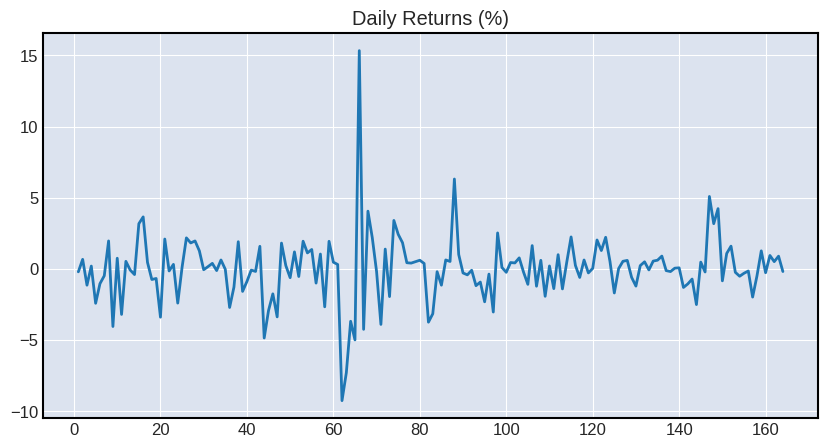

In [85]:
#we can visualize the daily_return data
data["daily_return"].plot(figsize=(10,5), title="Daily Returns (%)")


In [86]:
# moving averages (Trends)
data["MA20"] = data["close"].rolling(window=20).mean()
data["MA50"] = data["close"].rolling(window=50).mean()


In [87]:
data

,date,adj_close,close,high,low,open,volume,daily_return,MA20,MA50
0,1970-01-01 00:00:00.000000000,NaN,242.987427,248.218856,240.964609,248.049444,55740700,NaN,NaN,NaN
1,1970-01-01 00:00:00.000000001,NaN,242.499146,243.316237,241.034344,242.499146,40244100,-0.200949,NaN,NaN
2,1970-01-01 00:00:00.000000002,NaN,244.133347,246.455106,242.339711,243.445785,45045600,0.673900,NaN,NaN
3,1970-01-01 00:00:00.000000003,NaN,241.353226,244.681407,240.496267,242.120491,40856000,-1.138771,NaN,NaN
4,1970-01-01 00:00:00.000000004,NaN,241.841476,242.847913,239.200857,241.064237,37628900,0.202297,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
160,1970-01-01 00:00:00.000000160,NaN,227.160004,229.300003,226.229996,226.479996,30983100,-0.263431,220.941353,212.615341
161,1970-01-01 00:00:00.000000161,NaN,229.309998,229.490005,224.690002,226.869995,54575100,0.946467,221.855328,213.276995
162,1970-01-01 00:00:00.000000162,NaN,230.490005,230.899994,228.259995,228.610001,31259500,0.514591,222.939177,213.922894
163,1970-01-01 00:00:00.000000163,NaN,232.559998,233.410004,229.339996,230.820007,38074700,0.898083,224.200442,214.665730


In [88]:
#how risly the stock is
data["volatility"] = data["daily_return"].rolling(window=20).std()


array([<Axes: >, <Axes: >], dtype=object)

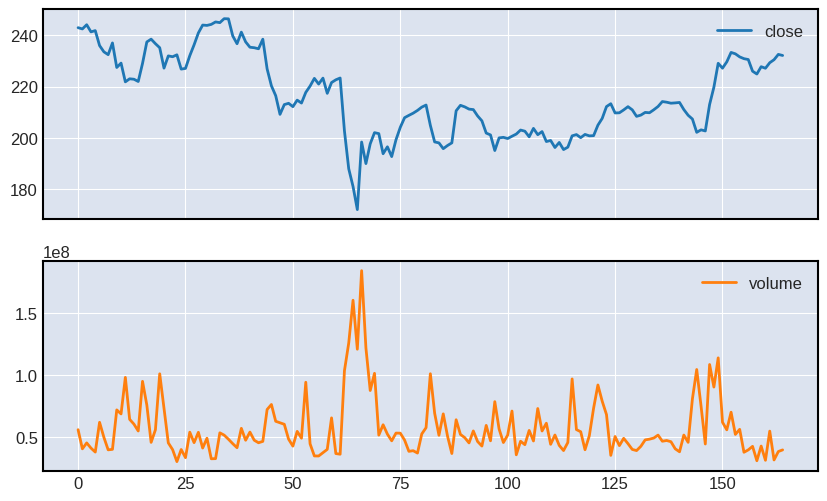

In [89]:
data[["close", "volume"]].plot(subplots=True, figsize=(10,6))


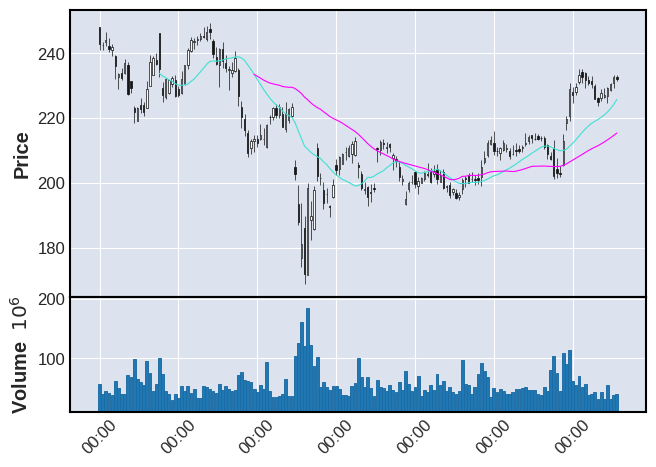

In [90]:
#candlestick chart
!pip install mplfinance

import mplfinance as mpf

mpf.plot(data.set_index("date"), type="candle", volume=True, mav=(20,50))


In [91]:
# created lagged prices for predictive modelling

data["close_lag1"] = data["close"].shift(1)


In [92]:
data

,date,adj_close,close,high,low,open,volume,daily_return,MA20,MA50,volatility,close_lag1
0,1970-01-01 00:00:00.000000000,NaN,242.987427,248.218856,240.964609,248.049444,55740700,NaN,NaN,NaN,NaN,NaN
1,1970-01-01 00:00:00.000000001,NaN,242.499146,243.316237,241.034344,242.499146,40244100,-0.200949,NaN,NaN,NaN,242.987427
2,1970-01-01 00:00:00.000000002,NaN,244.133347,246.455106,242.339711,243.445785,45045600,0.673900,NaN,NaN,NaN,242.499146
3,1970-01-01 00:00:00.000000003,NaN,241.353226,244.681407,240.496267,242.120491,40856000,-1.138771,NaN,NaN,NaN,244.133347
4,1970-01-01 00:00:00.000000004,NaN,241.841476,242.847913,239.200857,241.064237,37628900,0.202297,NaN,NaN,NaN,241.353226
...,...,...,...,...,...,...,...,...,...,...,...,...
160,1970-01-01 00:00:00.000000160,NaN,227.160004,229.300003,226.229996,226.479996,30983100,-0.263431,220.941353,212.615341,1.952284,227.759995
161,1970-01-01 00:00:00.000000161,NaN,229.309998,229.490005,224.690002,226.869995,54575100,0.946467,221.855328,213.276995,1.918492,227.160004
162,1970-01-01 00:00:00.000000162,NaN,230.490005,230.899994,228.259995,228.610001,31259500,0.514591,222.939177,213.922894,1.886417,229.309998
163,1970-01-01 00:00:00.000000163,NaN,232.559998,233.410004,229.339996,230.820007,38074700,0.898083,224.200442,214.665730,1.865836,230.490005


In [94]:
# Save cleaned Apple stock dataset
import os

# Create datasets folder if it doesn’t exist
os.makedirs("datasets", exist_ok=True)

# Now save cleaned Apple stock dataset
data.to_csv("datasets/AAPL_2025.csv", index=False)
data.to_csv("datasets/AAPL_2025.csv", index=False)


In [51]:
data["close_lag2"] = data["close"].shift(2)
data["close_lag3"] = data["close"].shift(3)


In [53]:

#Compute daily returns (to measure stock movement)
data["returns"] = data["close"].pct_change()


In [58]:
data["target"] = (data["close"] > data["close_lag1"]).astype(int)


In [95]:
import os

# Create project folders
os.makedirs("datasets", exist_ok=True)
os.makedirs("notebooks", exist_ok=True)
os.makedirs("utils", exist_ok=True)


In [96]:
data.to_csv("datasets/AAPL_2025.csv", index=False)


In [97]:
with open("utils/dataloader.py", "w") as f:
    f.write("""import pandas as pd
import os

def load_dataset(name: str) -> pd.DataFrame:
    \"\"\"Load a dataset by name from the datasets/ folder.\"\"\"
    path = os.path.join("datasets", f"{name}.csv")
    if not os.path.exists(path):
        raise FileNotFoundError(f"Dataset {name}.csv not found in datasets/")
    return pd.read_csv(path)
""")


In [98]:
from utils.dataloader import load_dataset

df = load_dataset("AAPL_2025")
print(df.head())


                            date  adj_close       close        high  \
0  1970-01-01 00:00:00.000000000        NaN  242.987427  248.218856   
1  1970-01-01 00:00:00.000000001        NaN  242.499146  243.316237   
2  1970-01-01 00:00:00.000000002        NaN  244.133347  246.455106   
3  1970-01-01 00:00:00.000000003        NaN  241.353226  244.681407   
4  1970-01-01 00:00:00.000000004        NaN  241.841476  242.847913   

          low        open    volume  daily_return  MA20  MA50  volatility  \
0  240.964609  248.049444  55740700           NaN   NaN   NaN         NaN   
1  241.034344  242.499146  40244100     -0.200949   NaN   NaN         NaN   
2  242.339711  243.445785  45045600      0.673900   NaN   NaN         NaN   
3  240.496267  242.120491  40856000     -1.138771   NaN   NaN         NaN   
4  239.200857  241.064237  37628900      0.202297   NaN   NaN         NaN   

   close_lag1  
0         NaN  
1  242.987427  
2  242.499146  
3  244.133347  
4  241.353226  


In [99]:
with open("README.md", "w") as f:
    f.write("# Quant Data Explorer\n\nThis is the README for my project...")


In [100]:
from google.colab import files
files.download("README.md")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
!git clone https://github.com/auroja2/quant-data-explorer.git
%cd quant-data-explorer


Cloning into 'quant-data-explorer'...
remote: Enumerating objects: 90, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 90 (delta 21), reused 76 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (90/90), 10.59 KiB | 1.06 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/quant-data-explorer


In [102]:
import os
os.makedirs("datasets", exist_ok=True)

# Save your Apple dataset
data.to_csv("datasets/AAPL_2025.csv", index=False)


In [104]:
readme_content = """
# Quant Data Explorer

This repository contains cleaned and structured financial datasets for analysis.

## 📂 Datasets
- `datasets/AAPL_2025.csv`: Apple stock dataset (2025)
  - Columns: date, open, high, low, close, volume, MA20, MA50, close_lag1, target

## 📓 Notebooks
- `notebooks/stock_analysis.ipynb`: Jupyter notebook with Apple stock analysis.

## 🔧 Helper Functions
You can load datasets using:
```python
from utils.loader import load_dataset

df = load_dataset("AAPL_2025")"""


In [105]:
os.makedirs("utils", exist_ok=True)

loader_code = """
import pandas as pd
import os

def load_dataset(name):
    path = os.path.join("datasets", f"{name}.csv")
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} not found.")
    return pd.read_csv(path)
"""
with open("utils/loader.py", "w") as f:
    f.write(loader_code)


In [106]:
!git config --global user.email "11aaurojapeshin@gmail.com"
!git config --global user.name "auroja2"

!git checkout -b add-dataset-apple
!git add .
!git commit -m "Added Apple dataset, analysis notebook, README, and loader function"
!git push origin add-dataset-apple


Switched to a new branch 'add-dataset-apple'
[add-dataset-apple 68b9d0e] Added Apple dataset, analysis notebook, README, and loader function
 2 files changed, 175 insertions(+)
 create mode 100644 datasets/AAPL_2025.csv
 create mode 100644 utils/loader.py
fatal: could not read Username for 'https://github.com': No such device or address
